In [108]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [109]:
# Leer archivo
ph = pd.read_csv('data/result.csv')
ph["Zone"] = ph["Zone"].fillna('')
ph["Province/State"] = ph["Province/State"].fillna('')

ph['Date'] = pd.to_datetime(ph['Date'])    
ph['date_delta'] = (ph['Date'] - ph['Date'].min())  / np.timedelta64(1,'D')
ph.head()


,Unnamed: 0,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Zone,date_delta
0,0,,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0.0,,0.0
1,1,,Albania,41.1533,20.1683,2020-01-22,0,0,0.0,,0.0
2,2,,Algeria,28.0339,1.6596,2020-01-22,0,0,0.0,,0.0
3,3,,Andorra,42.5063,1.5218,2020-01-22,0,0,0.0,,0.0
4,4,,Angola,-11.2027,17.8739,2020-01-22,0,0,0.0,,0.0


In [110]:
quality = pd.get_dummies(ph['date_delta'], drop_first=True)
quality.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,95.0,96.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,104.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
ph = pd.concat([ph, quality], axis=1)
ph = ph.drop(['Province/State','Country/Region', 'Date', 'Zone'], axis=1)


In [112]:
X = ph.loc[:, ph.columns != 'Confirmed']
X.head()

,Unnamed: 0,Lat,Long,Deaths,Recovered,date_delta,1.0,2.0,3.0,4.0,...,95.0,96.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,104.0
0,0,33.0000,65.0000,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,41.1533,20.1683,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,28.0339,1.6596,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,42.5063,1.5218,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,-11.2027,17.8739,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
Y = pd.DataFrame(ph.Confirmed, columns=['Confirmed'])
Y.head()

,Confirmed
0,0
1,0
2,0
3,0
4,0


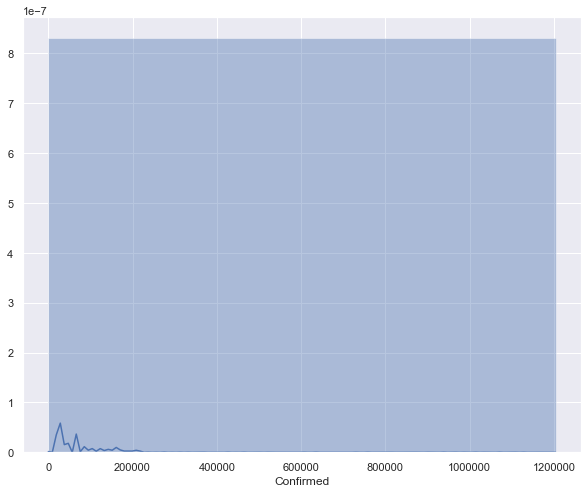

In [114]:
# Grafica de los datos de Y
sns.set(rc={'figure.figsize':(10,8)})

sns.distplot(Y['Confirmed'], bins=1)
plt.show()

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, test_size = 0.4, random_state=5)

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression(normalize=True)
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [117]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print(rmse," ",r2  )

3506.2706650296036   0.8513176405890028


In [118]:
y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

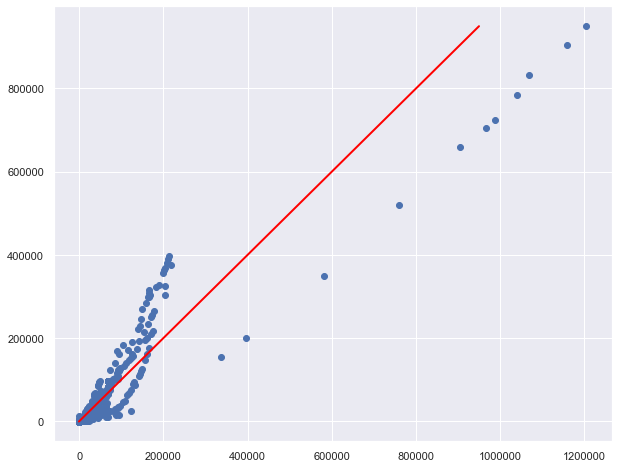

In [119]:
pred_space = np.linspace(min(y_test_predict), max(y_test_predict)).reshape(-1,1) 
plt.scatter(Y_test, y_test_predict)
plt.plot(pred_space,pred_space,color = 'red', linewidth = 2)
plt.show()